# STAT 207 Lab 8 - Group Part - [5 total points]

## Descriptive Analytics for Multiple Variables

Due: Tuesday, October 19, 11:59pm CST

## <u>Part 1</u>: [1 pt] Guess the Correlation Game

As a team, play the game on this website (http://guessthecorrelation.com/) and get at least 20 coins (as shown below). The point of the game is to accurately guess the correlation coefficients $R$ of the scatterplots that they show you. Once you have earned 20 coins, take a screencap of the screen and save it as an image in the folder that this ipynb file is saved in (ie. the one that you will push to your Github repository.)


![title](game_image.png)

In [1]:
#imports here
from scipy.stats import t
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import random
from scipy.stats import norm
from statistics import mean
import numpy as np

## <u>Part 2</u>: Instagram Dataset Analysis

### 2.1. Relationship between Two Numerical Variables - Controlling for a Third Variable

#### 2.1.1. [1 pt]  Visualizations

First, using the *pre-cleaned* Instagram dataset in this folder (ie. fake_insta_cleaned.csv), pick two numerical variables that you are interested in learning more about. In the plot below you should do the following.

1. Create a scatterplot for these two numerical variables.
2. Select a categorical variable that you are also interested in and color code the points in your scatterplot by the values of the categorical variable that you selected.
3. Plot a best fit line for each of the different colored points in this plot.



In [18]:
df = pd.read_csv('fake_insta_cleaned.csv')
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604,real
1,yes,5,64,3,35,6,real
2,yes,2,82,319,328,668,real
3,yes,1,76,6,225,356,real
4,yes,1,0,6,362,424,real


In [3]:
df_followers_follows = df.iloc[:,4:6]
df_followers_follows.head()

,number_of_followers,number_of_follows
0,488,604
1,35,6
2,328,668
3,225,356
4,362,424


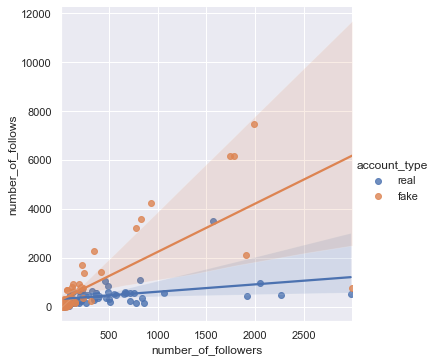

In [14]:
sns.lmplot(x='number_of_followers', y='number_of_follows', hue = 'account_type', data=df)
plt.show()

#### 2.1.2. [1 pt] Summary Statistics

For each of the sets of colored points in the scatterplot above, calculate the correlation coefficient. For full credit, calculate these two correlation coefficients using just one line of code below.

Which one these two sets of points has a stronger linear association (between the two numerical variables)?


In [17]:
df[['number_of_followers', 'number_of_follows', 'account_type']].groupby(['account_type']).corr()

number_of_followers  number_of_follows
account_type                                                            
fake         number_of_followers             1.000000           0.723146
             number_of_follows               0.723146           1.000000
real         number_of_followers             1.000000           0.363535
             number_of_follows               0.363535           1.000000

The fake account has a strong linear association.

### 2.2. Relationship between a Categorical Variable and a Numerical Variable - Controlling for a Third Variable

#### 2.2.1. [0.75 pt] Visualizations

Next, also using the Instagram dataset in this folder (ie. fake_insta_cleaned.csv), select the two categorical variables in the dataset as well as a numerical variable that you are interested in. Then, create a visualization (in just one plot) that visualizes the association between these three variables.


<AxesSubplot:xlabel='has_a_profile_pic', ylabel='number_of_followers'>

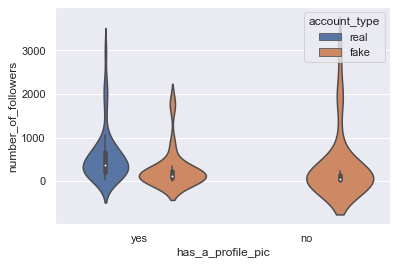

In [24]:
sns.violinplot(x="has_a_profile_pic", y='number_of_followers', hue = 'account_type', data=df)

#### 2.2.2. [0.75 pt] Summary Statistics

Finally, calculate the median of this numerical variable for each combination of the two categorical variable value levels. For full credit you should calculate these means in just one line of code.

In [37]:
df[['account_type','number_of_followers', 'has_a_profile_pic']].groupby('account_type').median()

,number_of_followers
account_type,
fake,74.5
real,364.0


#### 2.2.3. [0.5 pt] Interpretation

* Which type of accounts has the highest median (of the numerical variable you chose) in this dataset: real accounts with a profile picture, fake accounts with a profile picture, or fake accounts without a profile picture?

* Which type of accounts has the highest IQR (of the numerical variable you chose) in this dataset: real accounts with a profile picture, fake accounts with a profile picture, or fake accounts without a profile picture?

### <u>Contribution Report</u>: